In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,356,019","3,938,764"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,736,129","1,660,315"


# Total Trips

In [6]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,273,040","14,231,730"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"5,769,857","5,095,327"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.51
survey,2.48


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       4.77     31.79      0.00
           survey      4.43     26.63      0.00
HOV2       model       8.29     18.52      1.80
           survey      6.97     16.68      0.04
HOV3+      model       9.17     19.77      1.99
           survey     10.42     20.52      0.11
SOV        model       8.16     19.01      1.74
           survey      8.53     19.48      0.16
School Bus model       3.24     10.25      0.67
TNC        model       7.21     18.44      1.61
           survey      3.71     13.44      0.00
Transit    model       7.13     30.83      2.34
           survey      7.44     32.48      3.12
Walk       model       0.71     14.26      0.00
           survey      0.87     17.51      0.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.60     17.34      0.00
           survey      2.58     15.48      0.00
HOV2       model       3.54     10.73      0.73
           survey      3.61     11.21      0.08
HOV3+      model       3.85     11.18      0.80
           survey      4.10     11.82      0.01
SOV        model       5.92     15.60      1.25
           survey      8.31     18.11      0.30
School Bus model       3.62     10.82      0.74
           survey      3.30     10.34      0.00
TNC        model       2.93     10.58      0.59
           survey      2.24     14.53      0.00
Transit    model       4.80     33.37      0.16
           survey      8.06     24.02      3.04
Walk       model       1.28     25.55      0.00
           survey      0.75     15.00      0.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,444,944","2,855,094"
1,"911,075","1,083,669"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 0-4,NaN,"228,256"
Child Age 5-15,"557,103","514,797"
Full-Time Worker,"150,744","130,061"
High School Student Age 16+,"127,563","167,806"
Non-Working Adult Age 65+,65,37
Non-Working Adult Age <65,"2,492","9,840"
Part-Time Worker,"2,494","5,775"
University Student,"70,614","27,096"


# Auto Ownership

In [13]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
-1.0,NaN,626
0.0,"129,673","166,015"
1.0,"562,279","490,008"
2.0,"635,368","608,416"
3+,"408,809","395,250"


## By Income

In [14]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
-1.0   model        0        0        0        0       0
       survey       0        0        0        0     626
0.0    model   52,877   19,213   12,765    4,891  39,911
       survey  83,091   36,089   10,782        0  36,053
1.0    model   75,510   81,278   84,303   39,401 281,691
       survey 112,340   84,824   87,913        0 204,932
2.0    model   31,065   43,309   59,188   33,763 467,943
       survey  97,708   28,394   82,252        0 400,062
3.0    model    8,628   13,179   19,082   11,806 212,422
       survey  47,799   10,876   22,726        0 177,862
4+     model    3,468    5,153    9,045    5,626 120,291
       survey  33,443    8,019    7,406        0  87,119

In [15]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

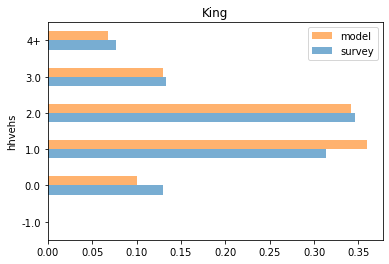

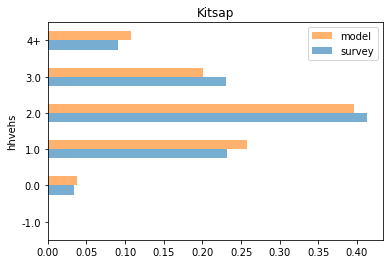

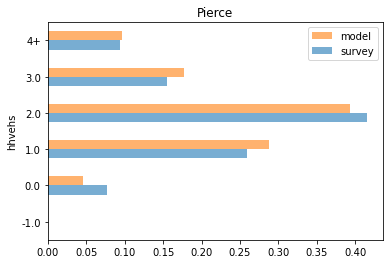

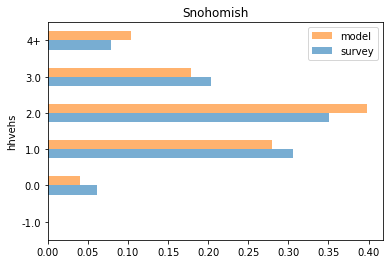

In [16]:
for county in df['hh_county'].unique():
    if county != 'Outside Region':
        _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
        _df.columns = ['survey','model']
        _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [17]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County         King Kitsap  Pierce Snohomish
Home County                                      
King           1,160,518  1,035  48,419    52,741
Kitsap            10,082 96,905  12,502     1,089
Outside Region       NaN      1     NaN       NaN
Pierce           105,144  6,063 298,841     1,309
Snohomish        147,919     91     859   283,416